In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
# Load the preprocessed dataframes from eda.ipynb directly in quality.ipynb
users = pd.read_csv("../data/processed/users_processed.csv")
receipts = pd.read_csv("../data/processed/receipts_processed.csv")
item_df = pd.read_csv("../data/processed/items_processed.csv")
brands = pd.read_csv("../data/processed/brands_processed.csv")

# Convert date columns back to datetime
date_columns = ["createdDate", "lastLogin"]
users[date_columns] = users[date_columns].apply(pd.to_datetime)

receipt_date_columns = [
    "createDate",
    "dateScanned",
    "finishedDate",
    "modifyDate",
    "pointsAwardedDate",
    "purchaseDate",
]
receipts[receipt_date_columns] = receipts[receipt_date_columns].apply(pd.to_datetime)


# Main things we are going to look at for Data Quality Issues

* 1. Missing values
* 2. Duplicates
* 3. Outliers


### But first checking the import of the dataframes


In [3]:
users.head()

,user_id,role,createdDate,lastLogin,active,state,signUpSource
0,5ff1e194b6a9d73a3a9f1052,consumer,2021-01-03 15:24:04.800,2021-01-03 15:25:37.858,True,WI,Email
1,5ff1e194b6a9d73a3a9f1052,consumer,2021-01-03 15:24:04.800,2021-01-03 15:25:37.858,True,WI,Email
2,5ff1e194b6a9d73a3a9f1052,consumer,2021-01-03 15:24:04.800,2021-01-03 15:25:37.858,True,WI,Email
3,5ff1e1eacfcf6c399c274ae6,consumer,2021-01-03 15:25:30.554,2021-01-03 15:25:30.597,True,WI,Email
4,5ff1e194b6a9d73a3a9f1052,consumer,2021-01-03 15:24:04.800,2021-01-03 15:25:37.858,True,WI,Email


In [4]:
receipts.head()

,receipt_id,userId,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,purchaseDate,purchasedItemCount,rewardsReceiptItemList,rewardsReceiptStatus,totalSpent
0,5ff1e1eb0a720f0523000575,5ff1e1eacfcf6c399c274ae6,500.0,"Receipt number 2 completed, bonus point schedu...",2021-01-03 15:25:31,2021-01-03 15:25:31,2021-01-03 15:25:31,2021-01-03 15:25:36,2021-01-03 15:25:31,2021-01-03 00:00:00,5.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,26.0
1,5ff1e1bb0a720f052300056b,5ff1e194b6a9d73a3a9f1052,150.0,"Receipt number 5 completed, bonus point schedu...",2021-01-03 15:24:43,2021-01-03 15:24:43,2021-01-03 15:24:43,2021-01-03 15:24:48,2021-01-03 15:24:43,2021-01-02 15:24:43,2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,11.0
2,5ff1e1f10a720f052300057a,5ff1e1f1cfcf6c399c274b0b,5.0,All-receipts receipt bonus,2021-01-03 15:25:37,2021-01-03 15:25:37,NaT,2021-01-03 15:25:42,NaT,2021-01-03 00:00:00,1.0,"[{'needsFetchReview': False, 'partnerItemId': ...",REJECTED,10.0
3,5ff1e1ee0a7214ada100056f,5ff1e1eacfcf6c399c274ae6,5.0,All-receipts receipt bonus,2021-01-03 15:25:34,2021-01-03 15:25:34,2021-01-03 15:25:34,2021-01-03 15:25:39,2021-01-03 15:25:34,2021-01-03 00:00:00,4.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,28.0
4,5ff1e1d20a7214ada1000561,5ff1e194b6a9d73a3a9f1052,5.0,All-receipts receipt bonus,2021-01-03 15:25:06,2021-01-03 15:25:06,2021-01-03 15:25:11,2021-01-03 15:25:11,2021-01-03 15:25:06,2021-01-02 15:25:06,2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,1.0


In [5]:
item_df.head()

,receipt_id,barcode,description,finalPrice,itemPrice,needsFetchReview,partnerItemId,preventTargetGapPoints,quantityPurchased,userFlaggedBarcode,...,itemNumber,originalMetaBriteQuantityPurchased,pointsEarned,targetPrice,competitiveProduct,originalFinalPrice,originalMetaBriteItemPrice,deleted,priceAfterCoupon,metabriteCampaignId
0,5ff1e1eb0a720f0523000575,4011,ITEM NOT FOUND,26.0,26.0,False,1.0,True,5.0,4.011000e+03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5ff1e1bb0a720f052300056b,4011,ITEM NOT FOUND,1.0,1.0,NaN,1.0,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5ff1e1bb0a720f052300056b,028400642255,DORITOS TORTILLA CHIP SPICY SWEET CHILI REDUCE...,10.0,10.0,True,2.0,True,1.0,2.840064e+10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5ff1e1f10a720f052300057a,NaN,NaN,NaN,NaN,False,1.0,True,NaN,4.011000e+03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5ff1e1ee0a7214ada100056f,4011,ITEM NOT FOUND,28.0,28.0,False,1.0,True,4.0,4.011000e+03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
brands.head()

,brand_id,cpg_id,barcode,category,categoryCode,name,topBrand,brandCode
0,601ac115be37ce2ead437551,601ac114be37ce2ead437550,511111019862,Baking,BAKING,test brand @1612366101024,False,NaN
1,601c5460be37ce2ead43755f,5332f5fbe4b03c9a25efd0ba,511111519928,Beverages,BEVERAGES,Starbucks,False,STARBUCKS
2,601ac142be37ce2ead43755d,601ac142be37ce2ead437559,511111819905,Baking,BAKING,test brand @1612366146176,False,TEST BRANDCODE @1612366146176
3,601ac142be37ce2ead43755a,601ac142be37ce2ead437559,511111519874,Baking,BAKING,test brand @1612366146051,False,TEST BRANDCODE @1612366146051
4,601ac142be37ce2ead43755e,5332fa12e4b03c9a25efd1e7,511111319917,Candy & Sweets,CANDY_AND_SWEETS,test brand @1612366146827,False,TEST BRANDCODE @1612366146827


### Let's have a quick look at the dataframes info

In [7]:
users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   user_id       495 non-null    object        
 1   role          495 non-null    object        
 2   createdDate   495 non-null    datetime64[ns]
 3   lastLogin     433 non-null    datetime64[ns]
 4   active        495 non-null    bool          
 5   state         439 non-null    object        
 6   signUpSource  447 non-null    object        
dtypes: bool(1), datetime64[ns](2), object(4)
memory usage: 23.8+ KB


In [8]:
receipts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1119 entries, 0 to 1118
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   receipt_id               1119 non-null   object        
 1   userId                   1119 non-null   object        
 2   bonusPointsEarned        544 non-null    float64       
 3   bonusPointsEarnedReason  544 non-null    object        
 4   createDate               1119 non-null   datetime64[ns]
 5   dateScanned              1119 non-null   datetime64[ns]
 6   finishedDate             568 non-null    datetime64[ns]
 7   modifyDate               1119 non-null   datetime64[ns]
 8   pointsAwardedDate        537 non-null    datetime64[ns]
 9   purchaseDate             671 non-null    datetime64[ns]
 10  purchasedItemCount       635 non-null    float64       
 11  rewardsReceiptItemList   679 non-null    object        
 12  rewardsReceiptStatus     1119 non-

In [9]:
item_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7381 entries, 0 to 7380
Data columns (total 35 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   receipt_id                          7381 non-null   object 
 1   barcode                             3090 non-null   object 
 2   description                         6560 non-null   object 
 3   finalPrice                          6767 non-null   float64
 4   itemPrice                           6767 non-null   float64
 5   needsFetchReview                    813 non-null    object 
 6   partnerItemId                       6941 non-null   float64
 7   preventTargetGapPoints              358 non-null    object 
 8   quantityPurchased                   6767 non-null   float64
 9   userFlaggedBarcode                  337 non-null    float64
 10  userFlaggedNewItem                  323 non-null    object 
 11  userFlaggedPrice                    299 non

In [10]:
brands.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1167 entries, 0 to 1166
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand_id      1167 non-null   object
 1   cpg_id        1167 non-null   object
 2   barcode       1167 non-null   int64 
 3   category      1012 non-null   object
 4   categoryCode  517 non-null    object
 5   name          1167 non-null   object
 6   topBrand      1167 non-null   bool  
 7   brandCode     898 non-null    object
dtypes: bool(1), int64(1), object(6)
memory usage: 65.1+ KB


It seems like the data types are correct. However, it appears that there are a lot of missing values, especially in the item_df dataframe.

## Missing Values

In [11]:
users.isna().sum()

user_id          0
role             0
createdDate      0
lastLogin       62
active           0
state           56
signUpSource    48
dtype: int64

In [12]:
receipts.isna().sum()

receipt_id                   0
userId                       0
bonusPointsEarned          575
bonusPointsEarnedReason    575
createDate                   0
dateScanned                  0
finishedDate               551
modifyDate                   0
pointsAwardedDate          582
purchaseDate               448
purchasedItemCount         484
rewardsReceiptItemList     440
rewardsReceiptStatus         0
totalSpent                 435
dtype: int64

In [13]:
item_df.isna().sum()

receipt_id                               0
barcode                               4291
description                            821
finalPrice                             614
itemPrice                              614
needsFetchReview                      6568
partnerItemId                          440
preventTargetGapPoints                7023
quantityPurchased                      614
userFlaggedBarcode                    7044
userFlaggedNewItem                    7058
userFlaggedPrice                      7082
userFlaggedQuantity                   7082
needsFetchReviewReason                7162
pointsNotAwardedReason                7041
pointsPayerId                         6114
rewardsGroup                          5650
rewardsProductPartnerId               5112
userFlaggedDescription                7227
originalMetaBriteBarcode              7357
originalMetaBriteDescription          7371
brandCode                             4781
competitorRewardsGroup                7106
discountedI

Let's look at the missing values in terms of percentage of the total data

In [14]:
na_perc = round((item_df.isna().sum() / len(item_df)) * 100, 1).sort_values(
    ascending=False
)
na_perc

deleted                               99.9
originalMetaBriteItemPrice            99.9
originalMetaBriteDescription          99.9
originalFinalPrice                    99.9
originalMetaBriteQuantityPurchased    99.8
originalMetaBriteBarcode              99.7
userFlaggedDescription                97.9
itemNumber                            97.9
needsFetchReviewReason                97.0
competitorRewardsGroup                96.3
userFlaggedPrice                      95.9
userFlaggedQuantity                   95.9
userFlaggedNewItem                    95.6
userFlaggedBarcode                    95.4
pointsNotAwardedReason                95.4
preventTargetGapPoints                95.1
targetPrice                           94.9
competitiveProduct                    91.3
needsFetchReview                      89.0
metabriteCampaignId                   88.3
pointsEarned                          87.4
priceAfterCoupon                      87.0
pointsPayerId                         82.8
rewardsGrou

In [15]:
# missing_percentages = round((item_df.isna().sum() / len(item_df)) * 100, 1)
columns_over_50 = (na_perc > 50).sum()
print(f"Number of columns with more than 50% missing values: {columns_over_50}")


Number of columns with more than 50% missing values: 27


Out of 35 columns in `item_df`, 27 have more than 50% missing values. To correctly handle the missing values, we need to understand their cause and ask what is the specific goal with that data, as this will impact the strategy to best handle them (replace with value/mean/median/mode, drop, etc...). Given the nature of the `item_df` data, it also makes sense that more columns would have missing values. Most columns in that dataset are about specific actions that are not applicable to all items. For instance, `priceAfterCoupon` is only applicable to items that have a coupon. 

This is to take into account in a potential analysis. If we were to analyse the impact of coupons on sales, for instance, we would want to filter and extract only the items with a coupon.



In [16]:
brands.isna().sum()

brand_id          0
cpg_id            0
barcode           0
category        155
categoryCode    650
name              0
topBrand          0
brandCode       269
dtype: int64

Overall, the dataframes have a lot of missing values. This is a data quality issue that we need to address.

## Duplicates

In [17]:
users["user_id"].duplicated().sum()

np.int64(283)

In [30]:
users[users["user_id"].duplicated(keep=False)].sort_values("user_id")


,user_id,role,createdDate,lastLogin,active,state,signUpSource,account_age_days
494,54943462e4b07e684157a532,fetch-staff,2014-12-19 14:21:22.381,2021-03-05 16:52:23.204,True,NaN,NaN,3605
475,54943462e4b07e684157a532,fetch-staff,2014-12-19 14:21:22.381,2021-03-05 16:52:23.204,True,NaN,NaN,3605
476,54943462e4b07e684157a532,fetch-staff,2014-12-19 14:21:22.381,2021-03-05 16:52:23.204,True,NaN,NaN,3605
477,54943462e4b07e684157a532,fetch-staff,2014-12-19 14:21:22.381,2021-03-05 16:52:23.204,True,NaN,NaN,3605
478,54943462e4b07e684157a532,fetch-staff,2014-12-19 14:21:22.381,2021-03-05 16:52:23.204,True,NaN,NaN,3605
...,...,...,...,...,...,...,...,...
365,60189c94c8b50e11d8454f6b,consumer,2021-02-02 00:28:04.020,2021-02-02 00:28:04.073,True,WI,Email,1369
387,601c2c05969c0b11f7d0b097,consumer,2021-02-04 17:16:53.700,2021-02-04 17:20:30.228,True,WI,Email,1366
385,601c2c05969c0b11f7d0b097,consumer,2021-02-04 17:16:53.700,2021-02-04 17:20:30.228,True,WI,Email,1366
394,60229990b57b8a12187fe9e0,consumer,2021-02-09 14:17:52.581,2021-02-09 14:17:52.626,True,WI,Email,1361


The users dataframe contains a lot of duplicates. Even if it is easy to drop them, we need to understand what is causing them. Is it a process error? Is it a data entry error? users error? 

In [32]:
# checking if for each duplicate user_id, the other columns are the same
# Group by user_id and check if any groups have different values in other columns
duplicate_analysis = (
    users[users["user_id"].duplicated(keep=False)]
    .groupby("user_id")
    .agg(
        {
            "role": "nunique",
            "createdDate": "nunique",
            "lastLogin": "nunique",
            "active": "nunique",
            "state": "nunique",
            "signUpSource": "nunique",
        }
    )
    .reset_index()
)

duplicate_analysis

,user_id,role,createdDate,lastLogin,active,state,signUpSource
0,54943462e4b07e684157a532,1,1,1,1,0,0
1,59c124bae4b0299e55b0f330,1,1,1,1,1,0
2,5a43c08fe4b014fd6b6a0612,1,1,1,1,0,0
3,5fa41775898c7a11a6bcef3e,1,1,1,1,0,1
4,5fb0a078be5fc9775c1f3945,1,1,0,1,1,1
...,...,...,...,...,...,...,...
65,60186237c8b50e11d8454d5f,1,1,0,1,0,1
66,60189c74c8b50e11d8454eff,1,1,1,1,1,1
67,60189c94c8b50e11d8454f6b,1,1,1,1,1,1
68,601c2c05969c0b11f7d0b097,1,1,1,1,1,1


In [33]:
# print only the rows where any column has more than 1 unique value
duplicate_analysis[
    (duplicate_analysis["role"] > 1)
    | (duplicate_analysis["createdDate"] > 1)
    | (duplicate_analysis["lastLogin"] > 1)
    | (duplicate_analysis["active"] > 1)
    | (duplicate_analysis["state"] > 1)
    | (duplicate_analysis["signUpSource"] > 1)
]


,user_id,role,createdDate,lastLogin,active,state,signUpSource


The duplicates in the users dataframe are only due to exact copies of the same rows. This is good as it indicates that `user_id` is still a uuid, uniquely identifying each users. This would have been a bigger problem as the database would have been compromised. 

In [19]:
receipts["receipt_id"].duplicated().sum()


np.int64(0)

In [20]:
item_df[["receipt_id", "barcode"]].duplicated().sum()

np.int64(4881)

Initially, I would think that each unique transaction of an item would be identified by a unique combination of`receipt_id` and `barcode`.

In [27]:
item_df[item_df[["receipt_id", "barcode"]].duplicated(keep=False)]


,receipt_id,barcode,description,finalPrice,itemPrice,needsFetchReview,partnerItemId,preventTargetGapPoints,quantityPurchased,userFlaggedBarcode,...,itemNumber,originalMetaBriteQuantityPurchased,pointsEarned,targetPrice,competitiveProduct,originalFinalPrice,originalMetaBriteItemPrice,deleted,priceAfterCoupon,metabriteCampaignId
14,5ff1e1b60a7214ada100055c,034100573065,MILLER LITE 24 PACK 12OZ CAN,29.00,29.00,NaN,1.0,NaN,1.0,NaN,...,NaN,NaN,870.0,77.0,NaN,NaN,NaN,NaN,NaN,NaN
15,5ff1e1b60a7214ada100055c,034100573065,MILLER LITE 24 PACK 12OZ CAN,29.00,29.00,NaN,2.0,NaN,1.0,NaN,...,NaN,NaN,870.0,77.0,NaN,NaN,NaN,NaN,NaN,NaN
16,5ff1e1b60a7214ada100055c,034100573065,MILLER LITE 24 PACK 12OZ CAN,29.00,29.00,NaN,3.0,NaN,1.0,NaN,...,NaN,NaN,870.0,77.0,NaN,NaN,NaN,NaN,NaN,NaN
17,5ff1e1b60a7214ada100055c,034100573065,MILLER LITE 24 PACK 12OZ CAN,29.00,29.00,NaN,4.0,NaN,1.0,NaN,...,NaN,NaN,870.0,77.0,NaN,NaN,NaN,NaN,NaN,NaN
18,5ff1e1b60a7214ada100055c,034100573065,MILLER LITE 24 PACK 12OZ CAN,29.00,29.00,NaN,5.0,NaN,1.0,NaN,...,NaN,NaN,870.0,77.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7141,602402750a720f05a800016f,043000048528,NaN,9.99,9.99,NaN,1.0,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN
7142,602402750a720f05a800016f,043000048528,NaN,9.99,9.99,NaN,2.0,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN
7143,602402750a720f05a800016f,043000048528,NaN,9.99,9.99,NaN,3.0,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN
7144,602402750a720f05a800016f,043000048528,NaN,9.99,9.99,NaN,4.0,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN


It appears that for the same receipt an item can appear multiple times with a different `partnerItemId`value. I am not exactly sure what this field corresponds to, but let's see if by adding it in the combination a unique identification of transaction we would still have duplicates. 

In [28]:
item_df[["receipt_id", "barcode", "partnerItemId"]].duplicated().sum()


np.int64(0)

Now that we see no more duplicates, we understand that each unique transaction of an item is identified by a unique combination of `receipt_id`, `barcode` and `partnerItemId`.

After research about the `partnerItemId` field, I understand that the same product could indeed have different PartnerItemId values if it is offered by multiple partners, each with its own unique identifier for that product. This situation is common in reward programs that work with several suppliers or vendors who may offer identical or similar products but assign them their own unique identifiers.


In [22]:
brands["brand_id"].duplicated().sum()

np.int64(0)

## Outliers

In [47]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime


In [56]:
# users['createdDate'] = pd.to_datetime(users['createdDate'])

# Calculate account age in days
users["account_age_days"] = (datetime.now() - users["createdDate"]).dt.days


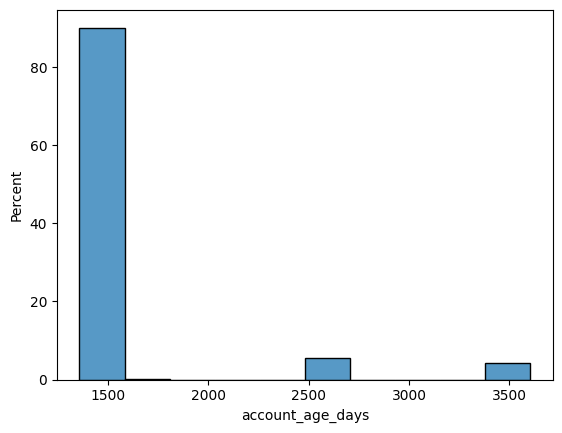

In [60]:
# plot the histogram
sns.histplot(users["account_age_days"], stat="percent", bins=10)
plt.show()


We notice that 90% of the users have an account age of less than 1600 days. Less than 5% of the users have an account age of more than 3000 days. This is still a large number of users, so we can't consider them as outliers. 

In [61]:
# lets look at the total spent in receipts to see if there are any outliers
receipts["totalSpent"].describe()


count     684.000000
mean       77.796857
std       347.110349
min         0.000000
25%         1.000000
50%        18.200000
75%        34.960000
max      4721.950000
Name: totalSpent, dtype: float64

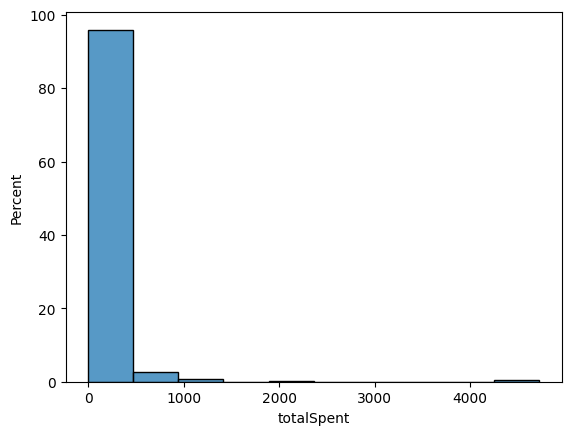

In [63]:
sns.histplot(receipts["totalSpent"], stat="percent", bins=10)
plt.show()

More than 95% of the receipts have an amount of less than 1000 dollars. 

In [67]:
len(receipts[receipts["totalSpent"] > 1000])


10

In [70]:
len(receipts)


1119

In [71]:
# print the maximum total spent
receipts["totalSpent"].max()


np.float64(4721.95)

There are only 10 receipts out of the 1119 that have a total spent of more than 1000 dollars. This is not a lot, so we can consider them as outliers. It will be important to take into consideration in any analysis.  

In [73]:
item_df.describe()

,finalPrice,itemPrice,partnerItemId,quantityPurchased,userFlaggedBarcode,userFlaggedPrice,userFlaggedQuantity,originalMetaBriteBarcode,discountedItemPrice,itemNumber,originalMetaBriteQuantityPurchased,pointsEarned,targetPrice,originalFinalPrice,originalMetaBriteItemPrice,priceAfterCoupon
count,6767.000000,6767.000000,6941.000000,6767.000000,3.370000e+02,299.000000,299.000000,2.400000e+01,5769.000000,1.530000e+02,15.000000,927.000000,378.000000,9.0,9.0,956.000000
mean,7.871661,7.872178,988.524276,1.386139,2.227665e+10,22.780870,1.872910,5.656926e+10,7.664366,5.102201e+10,1.200000,140.508306,648.896825,4.0,4.0,10.393358
std,14.656776,14.656623,527.380822,1.204363,2.121378e+10,9.277958,1.314823,2.647104e+10,15.463778,1.553664e+11,0.414039,223.005594,294.354624,4.5,4.5,18.695615
min,0.000000,0.000000,0.000000,1.000000,1.234000e+03,1.000000,1.000000,2.900002e+09,0.160000,4.011000e+03,1.000000,4.500000,77.000000,1.0,1.0,0.190000
25%,2.290000,2.290000,1027.000000,1.000000,4.011000e+03,21.000000,1.000000,3.410057e+10,2.340000,4.023000e+03,1.000000,28.050000,800.000000,1.0,1.0,2.685000
50%,4.280000,4.280000,1143.000000,1.000000,3.410057e+10,28.000000,1.000000,7.592531e+10,3.990000,4.023000e+03,1.000000,50.000000,800.000000,1.0,1.0,4.990000
75%,9.990000,9.990000,1274.000000,1.000000,3.410057e+10,29.000000,3.000000,8.087804e+10,7.960000,3.600016e+10,1.000000,165.450000,800.000000,10.0,10.0,11.990000
max,441.580000,441.580000,2043.000000,17.000000,7.940007e+10,29.000000,5.000000,8.087804e+10,441.580000,8.872140e+11,2.000000,870.000000,800.000000,10.0,10.0,245.000000


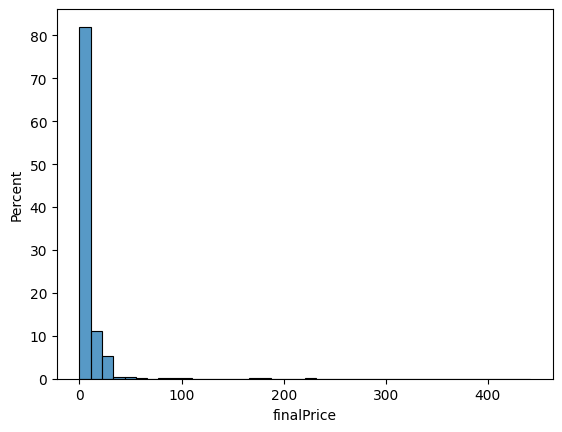

In [88]:
# let's look at the finalPrice
sns.histplot(item_df["finalPrice"], stat="percent", bins=40)
plt.show()


In [92]:
len(item_df[item_df["finalPrice"] > 50])


61

In [93]:
len(item_df[item_df["finalPrice"] > 50]) / len(item_df)


0.008264462809917356

More than 95% of the items have a final price of less than 50 dollars. Only 0.01% of items' final price are above that 50 dollars threshold, so we can consider them as outliers. They could have a big impact on a analysis of the conversion rates of coupons for instance, so we need to take them into account. 